# Testing the OPNMF method

This notebook uses the data available from the UK BioBank database. The data includes 599 Cognitive Normal Males. We use the 145 Regions Of Interest (ROI) that are included, to apply OPNMF and see the optimal number of components. 

In a later change, the ROIs will be replaced with the RAVENS maps

In [65]:
import pandas as pd
import numpy as np
import matplotlib

data = pd.read_csv("DATA/ukbb_cn_males_baseline_4550.csv")
data.head()

,PTID,Date,Visit_Code,Age,Study,Phase,Delta_Baseline,Education_Years,APOE_Genotype,APOE4_Alleles,...,WMLS,RAVENS_GM,RAVENS_VN,RAVENS_WM,RAVENS_CSF,H_RAVENS_GM,H_RAVENS_VN,H_RAVENS_WM,H_RAVENS_CSF,session_id
0,1214962,2015-07-11,2_0,45.0,UKBIOBANK,UKBB-Batch8,1892.0,NaN,E2/E3,0.0,...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,1
1,1177941,2014-08-30,2_0,45.0,UKBIOBANK,UKBB-Batch3,1607.0,NaN,E3/E3,0.0,...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,1
2,1065888,2016-08-20,2_0,46.0,UKBIOBANK,UKBB-Batch8,2227.0,NaN,E3/E3,0.0,...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,1
3,1080555,2015-03-09,2_0,46.0,UKBIOBANK,UKBB-Batch8,1925.0,NaN,NaN,NaN,...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,1
4,1109805,2016-04-03,2_0,46.0,UKBIOBANK,UKBB-Batch4,2085.0,NaN,E3/E3,0.0,...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/UKBB_Processed/Pipelines/UKBB_...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,/cbica/projects/ISTAGING/Pipelines/ISTAGING_Da...,1


### The columns that interest us are the 145 ROIs:

We need essentially the columns MUSE_Volume_4 , ... , MUSE_Volume_207.

In [66]:
column_list = list(data.columns)
start = column_list.index("MUSE_Volume_4")
end   = column_list.index("MUSE_Volume_207")

roi_matrix = data[ column_list[start:end+1] ]
# Add the PTID for reference:
# roi_matrix = data[ ["PTID"] + column_list[start:end+1]]
roi_matrix.head()

,MUSE_Volume_4,MUSE_Volume_11,MUSE_Volume_23,MUSE_Volume_30,MUSE_Volume_31,MUSE_Volume_32,MUSE_Volume_35,MUSE_Volume_36,MUSE_Volume_37,MUSE_Volume_38,...,MUSE_Volume_198,MUSE_Volume_199,MUSE_Volume_200,MUSE_Volume_201,MUSE_Volume_202,MUSE_Volume_203,MUSE_Volume_204,MUSE_Volume_205,MUSE_Volume_206,MUSE_Volume_207
0,1057.003024,1790.005121,382.001093,358.001024,955.002732,987.002824,23171.066293,3175.009084,3089.008838,47976.137260,...,9446.027025,10389.029723,7161.020488,6581.018828,8594.024588,7765.022216,3177.009089,3828.010952,1508.004314,1684.004818
1,1395.006984,2848.014259,550.002754,575.002879,1267.006344,1222.006118,26027.130312,4036.020207,3790.018976,66299.331945,...,12556.062865,11597.058064,7684.038472,9264.046383,9924.049687,10564.052892,3113.015586,3225.016147,1391.006964,1389.006954
2,763.999818,1554.999629,362.999913,361.999914,1041.999752,1104.999737,21884.994782,2855.999319,2878.999314,55630.986737,...,8629.997942,9008.997852,6600.998426,7305.998258,10003.997615,8926.997872,3400.999189,3901.999070,1145.999727,1676.999600
3,632.000753,1230.001466,468.000558,470.000560,938.001118,971.001158,22836.027223,3024.003605,3075.003666,53106.063307,...,9406.011213,9517.011345,7208.008593,6852.008168,8861.010563,8875.010580,3112.003710,4133.004927,1600.001907,2177.002595
4,566.000270,1137.000542,468.000223,467.000223,1092.000521,1203.000574,24355.011613,2930.001397,2913.001389,44892.021406,...,9209.004391,9116.004347,7104.003387,8328.003971,10632.005070,8658.004128,3219.001535,4058.001935,1561.000744,2289.001091


### Normalize the ROIs:

In [67]:
normalized_roi_matrix=(roi_matrix-roi_matrix.min())/(roi_matrix.max()-roi_matrix.min())*100
normalized_roi_matrix.head()

,MUSE_Volume_4,MUSE_Volume_11,MUSE_Volume_23,MUSE_Volume_30,MUSE_Volume_31,MUSE_Volume_32,MUSE_Volume_35,MUSE_Volume_36,MUSE_Volume_37,MUSE_Volume_38,...,MUSE_Volume_198,MUSE_Volume_199,MUSE_Volume_200,MUSE_Volume_201,MUSE_Volume_202,MUSE_Volume_203,MUSE_Volume_204,MUSE_Volume_205,MUSE_Volume_206,MUSE_Volume_207
0,22.333797,25.310154,23.545153,11.064884,11.066030,20.596018,32.253891,27.405868,40.702774,10.265429,...,40.195893,53.761606,38.184662,27.095190,16.195667,16.238733,41.948443,44.354165,41.400857,38.282606
1,32.024275,49.609853,67.989830,56.367791,53.689791,51.036899,49.106811,55.396974,63.937995,60.435726,...,75.549188,71.756816,47.855795,74.026424,34.528367,53.102047,39.943639,29.865980,35.826905,25.089580
2,13.933477,19.912694,18.518409,11.899722,22.950957,35.880612,24.665105,17.034996,33.741936,31.224988,...,30.919692,33.204173,27.829285,39.776453,35.630347,31.541986,48.965660,46.131881,24.154345,37.969315
3,10.149102,12.448337,46.296228,34.446733,8.743387,18.523260,30.276909,22.496744,40.238568,24.311556,...,39.741014,40.771718,39.053519,31.835307,19.875728,30.857311,39.911938,51.682270,45.783779,60.330671
4,8.256886,10.312349,46.296140,33.820361,29.781714,48.575037,39.240057,19.440772,34.868947,1.820886,...,37.501541,34.798178,37.130357,57.653269,44.286629,27.999330,43.263993,49.880170,43.925697,65.339518


### Perform OPNMF:

For testing purposes I use sklearn NMF code, later use of lab OPNMF code will be integrated

In [68]:
from sklearn.decomposition import NMF

model = NMF(n_components=18, init='random', random_state=0, max_iter=5000)
W = model.fit_transform(normalized_roi_matrix)
H = model.components_

### Visualize the Coefficients:

In [77]:
coeffs = pd.DataFrame(W,columns = ["Component " + str(i+1) for i in range(model.n_components)])
coeffs.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Component 12,Component 13,Component 14,Component 15,Component 16,Component 17,Component 18
0,2.459898,0.423744,0.931475,0.000000,0.840692,3.039600,0.935822,0.485301,0.288034,2.447542,0.000000,1.193371,2.435244,2.079515,1.530588,1.941043,1.478721,0.364583
1,0.828030,2.786958,3.553455,2.721096,1.646939,6.717957,1.822474,1.822576,2.516197,0.295859,2.407094,0.951390,2.249399,0.000000,2.234570,2.560864,1.073027,1.999624
2,6.796636,3.513108,2.574221,0.000000,1.022791,2.396651,0.652889,0.588703,0.458944,0.419344,0.000000,0.000000,1.605214,0.000000,1.569310,3.396855,1.636174,1.165219
3,5.059488,3.198297,1.573845,1.239967,0.574101,3.530107,2.466629,0.599458,1.328156,2.271253,0.204155,0.000000,2.169149,2.497214,2.349669,2.538714,0.908674,0.344030
4,5.408747,3.722463,2.912291,1.121762,0.000000,3.131542,1.542064,1.600950,0.958946,0.564767,0.215583,0.000000,3.686751,2.305430,0.963403,1.741627,2.921104,0.000000


<AxesSubplot:>

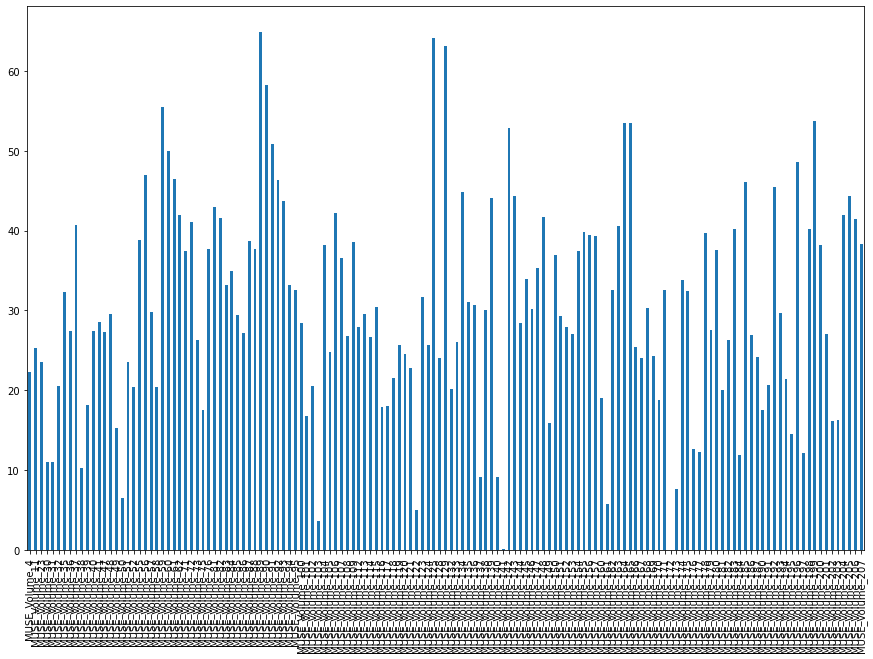

In [78]:
normalized_roi_matrix.iloc[0].plot(kind='bar', figsize=(15,10))

<AxesSubplot:>

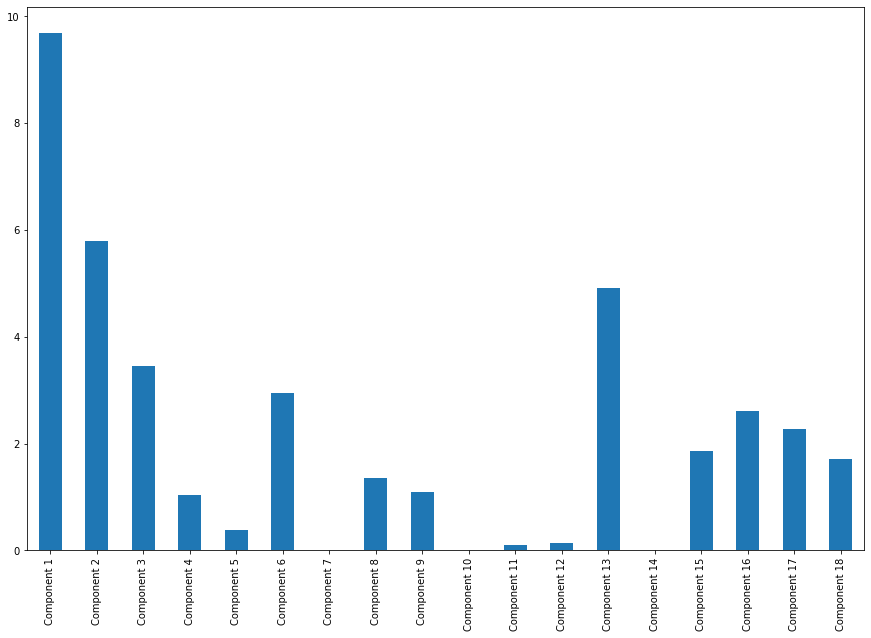

In [80]:
coeffs.iloc[580].plot(kind='bar', figsize=(15,10))

### Saving the component Coefficients Array for use in further analysis:

In [81]:
coeffs.to_pickle("DATA/ROI_OPNMF_Component_Coefficients.pkl")

### Saving the Components for use in further analysis:

In [89]:
components = pd.DataFrame(H,columns = ["ROI " + str(i+1) for i in range(H.shape[1])])
components.to_pickle("DATA/OPNMF_Components.pkl")
components.head()

,ROI 1,ROI 2,ROI 3,ROI 4,ROI 5,ROI 6,ROI 7,ROI 8,ROI 9,ROI 10,...,ROI 136,ROI 137,ROI 138,ROI 139,ROI 140,ROI 141,ROI 142,ROI 143,ROI 144,ROI 145
0,0.000000,0.340906,0.499850,0.437485,0.112716,0.000000,0.000000,0.000000,0.332563,0.012183,...,0.000000,0.000000,0.637108,0.199207,0.502271,0.159445,4.398159,2.897956,0.000000,0.000000
1,0.000000,0.000000,1.278112,0.832263,0.000000,0.000000,0.000000,0.000000,0.000000,0.531988,...,0.000000,0.000000,3.498340,4.241993,3.533240,2.761904,0.000000,0.882774,3.802939,4.428068
2,0.000000,0.000000,1.401856,1.449657,0.716616,0.698861,0.052333,0.674068,1.121978,0.000000,...,0.555713,0.856702,0.000000,0.000000,1.272677,1.969680,1.037040,0.000000,0.323982,0.519467
3,0.000000,0.000000,2.257520,2.240176,1.279542,0.955744,1.808846,0.941900,0.962342,1.623447,...,0.304782,0.000000,0.000000,0.000000,0.356067,0.067548,0.801355,1.208601,0.571103,0.000000
4,1.282321,1.963048,0.000000,0.000000,0.000000,1.291704,7.056316,0.000000,0.931822,11.702049,...,0.968931,0.000000,0.000000,0.000000,0.000000,0.079645,0.000000,0.000000,1.373778,0.958158
